In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', grid=False, ticks=True)

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2023-04-23 14:30:53.246095: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 14:30:53.886266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

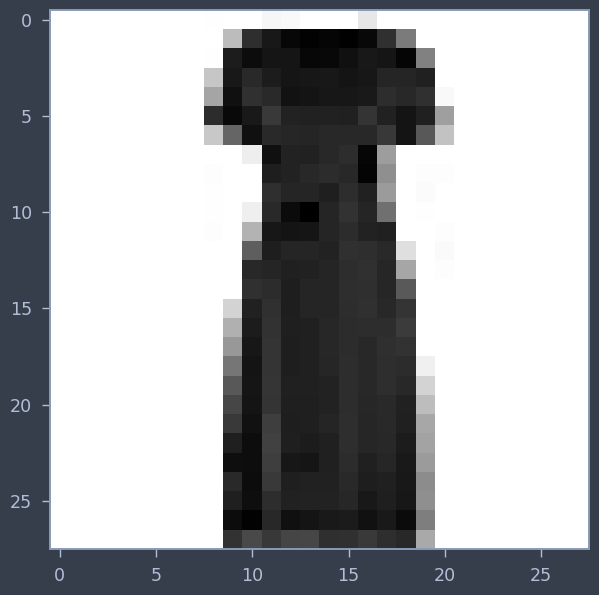

In [7]:
plt.imshow(X_train[50], cmap='binary')

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

2023-04-23 14:30:55.466718: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2073 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/50


2023-04-23 14:30:56.870079: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-23 14:30:56.871485: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f685090edc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-23 14:30:56.871501: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-04-23 14:30:56.874421: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-23 14:30:56.978967: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-23 14:30:57.067330: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifeti

1875/1875 [==============================] - 4s 1ms/step - loss: 0.4809 - accuracy: 0.8273
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3600 - accuracy: 0.8677
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3258 - accuracy: 0.8803
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3047 - accuracy: 0.8885
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2880 - accuracy: 0.8925
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2728 - accuracy: 0.8977
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2590 - accuracy: 0.9036
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2504 - accuracy: 0.9057
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2382 - accuracy: 0.9106
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2291 - accurac

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 803us/step - loss: 0.5593 - accuracy: 0.8924


[0.5593309998512268, 0.8924000263214111]

In [11]:
preds = model.predict(X_test)

313/313 [==============================] - 0s 572us/step


In [12]:
np.argmax(preds[0])

9

In [13]:
y_preds=[]
for i in range(len(y_test)):
    y_preds.append(np.argmax(preds[i]))

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.77      0.79      1000
           3       0.90      0.90      0.90      1000
           4       0.80      0.81      0.81      1000
           5       0.99      0.96      0.98      1000
           6       0.71      0.72      0.72      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [17]:
classes={0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}

In [19]:
classes[1]

'Trouser'